In [1]:
!pip install pandas-profiling==2.7.1

In [2]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

%cd '/content/gdrive/MyDrive/LDS6_S7CN_KieuTriDang/Demo/Chapter7_Random_Forest'

Mounted at /content/gdrive/
/content/gdrive/MyDrive/LDS6_S7CN_KieuTriDang/Demo/Chapter7_Random_Forest


In [3]:
import pandas as pd

iris = pd.read_excel('./Iris.xls')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = iris[["petalwidth", "petallength", "sepalwidth", "sepallength"]]
y = iris["iris"]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [7]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 50)

model = clf.fit(X_train, y_train)

In [8]:
# Xem chơi thôi không có ý nghĩa gì cả
model.estimators_[:3]

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1542035293, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=961316834, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, m

In [9]:
y_pred = model.predict(X_test)

In [10]:
from sklearn import metrics

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9555555555555556


In [31]:
# Make new prediction
import numpy as np
X_new = np.array([[4.7, 3.2, 1.3, 0.2],
                  [6.6, 3. , 4.4, 1.4],
                  [5.9, 3. , 5.1, 1.8]])

In [32]:
yhat_new = model.predict(X_new)
yhat_new

ValueError: ignored

In [13]:
score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)
print('score_train: ', score_train)
print('score_test: ', score_test)

score_train:  1.0
score_test:  0.9555555555555556


### Nhận xét:
- Rừng 50 cây tốt hơn

# Find important features in sklearn

In [14]:
important_features = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending = False)
important_features

petalwidth     0.462124
petallength    0.421541
sepallength    0.094004
sepalwidth     0.022332
dtype: float64

In [15]:
import matplotlib.pyplot as plt

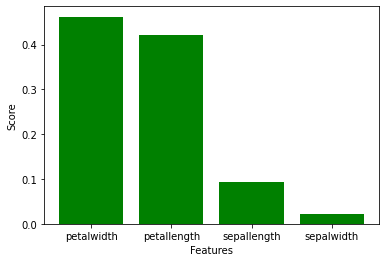

In [16]:
plt.bar(important_features.index, important_features, color='g')
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()

###  Chọn lại feature mới để build mô hình mới

In [17]:
X = iris[['petallength', 'petalwidth']]
y = iris['iris']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [19]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
y_pred = model.predict(X_test)

In [21]:
score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)
print('score_train: ', score_train)
print('score_test: ', score_test)

score_train:  0.9904761904761905
score_test:  0.9777777777777777


In [28]:
X_new = np.array([[1.3, 0.2],
                  [4.4, 1.4],
                  [5.1, 1.8]])
yhat_new = model.predict(X_new)
yhat_new

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [34]:
# Avarage max depth
max_depth = list()
for tree in model.estimators_:
  max_depth.append(tree.tree_.max_depth)

print("avarage max depth %0.1f" % (sum(max_depth) / len(max_depth)))

avarage max depth 4.9
